# Thermodynamics and the Maxwell-Boltzmann distribution

Here we use SymPy to learn a bit about ideal gases

In [1]:
from sympy import init_session
init_session()
%matplotlib inline

IPython console for SymPy 1.13.2 (Python 3.12.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.2/



Note: we need to tell SymPy that some of these quantities are real and positive so it is able to do the integrals without worrying about complex numbers

In [2]:
ni, m, k, T = symbols("n_I m k_B T", real=True, positive=True)
p, v = symbols("p v", real=True)
n = symbols("n")

Let's write the Maxwell-Boltzmann distribution, already transformed into spherical coordinates:

$$n(p) d^3 p \rightarrow 4\pi p^2 n(p) dp$$

our `n` here includes the $4\pi p^2$

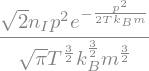

In [3]:
n = 4*pi* p**2 * ni / (2 * pi * m * k *T)**Rational(3,2) * exp(-p**2/(2*m*k*T))
n

## average velocity

We want to compute the average velocity:

$$\langle v \rangle = \frac{1}{n_I} \int_{-\infty}^{\infty} n(v)v d^3 v$$

We'll express $v = p / m$ and work in terms of momentum

$$\langle v \rangle = \frac{1}{m n_I} \int_{-\infty}^{\infty} n(p) p d^3 p$$

now switching to spherical coordinates in momentum space:

$$\langle v \rangle = \frac{1}{m n_I} \int_{0}^{\infty} 4 \pi n(p) p^3 dp$$


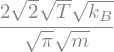

In [4]:
vavg = (1/ni) * integrate(n * p / m, (p, 0, oo))
vavg

Notice that this value is greater than the most likely velocity (where the peak of the M-B) distribution is.  This is because there is a long tail to high velocities.  We can see this via a plot

In [5]:
xi = symbols("xi")

We'll define a dimensionless momentum to allow us to plot this:

$$\xi = \frac{p}{\sqrt{2mkT}}$$

Then

$$n(p)dp \rightarrow n(\xi) d\xi$$

with $n(xi) d\xi$ as

In [6]:
n_dxi = n.subs(p, sqrt(2*m*k*T)*xi)/ni * sqrt(2*m*k*T)

and our average velocity is then:

In [7]:
xi_avg = m * vavg / sqrt(2*m*k*T)
xi_avg

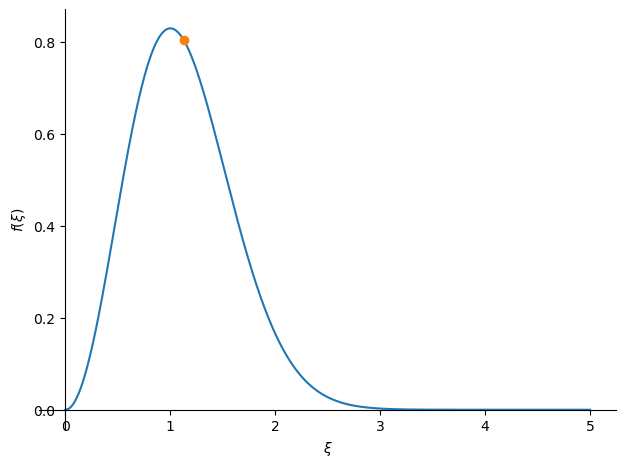

In [8]:
fig = plot(n_dxi, (xi, 0, 5),
           markers=[{'args': [[xi_avg], [n_dxi.subs(xi, xi_avg)], "o"]}])

Here we see that the average velocity is slightly larger than the most probably velocity (the location of the peak).